In [277]:
import pandas as pd
import numpy as np 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.cbook as cbook


customers=pd.read_csv("customers.csv") 
products=pd.read_csv("products.csv") 
transactions=pd.read_csv("transactions.csv",parse_dates=[2])

data_final=pd.merge(transactions,products,how='left',on=["id_prod"]) 
data_final.shape

data_final=pd.merge(data_final,customers,how='left',on=["client_id"]) 
data_final

(337016, 6)

,id_prod,date,session_id,client_id,price,categ,sex,birth
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,f,1977
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,65.75,2.0,f,2000
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,10.71,1.0,f,1979
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,4.20,0.0,m,1963
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,8.99,0.0,f,1980
...,...,...,...,...,...,...,...,...
337011,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454,31.99,1.0,m,1969
337012,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268,22.99,0.0,m,1991
337013,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137,11.03,0.0,f,1968
337014,2_227,2021-10-30 16:50:15.997750,s_112349,c_5,50.99,2.0,f,1994


# Cleaning 

## Valeurs nulles

In [278]:
bool_series = pd.isnull(data_final["categ"])
data_final[bool_series]

,id_prod,date,session_id,client_id,price,categ,sex,birth
6235,0_2245,2021-06-17 03:03:12.668129,s_49705,c_1533,NaN,NaN,m,1972
10802,0_2245,2021-06-16 05:53:01.627491,s_49323,c_7954,NaN,NaN,m,1973
14051,0_2245,2021-11-24 17:35:59.911427,s_124474,c_5120,NaN,NaN,f,1975
17486,0_2245,2022-02-28 18:08:49.875709,s_172304,c_4964,NaN,NaN,f,1982
21078,0_2245,2021-03-01 00:09:29.301897,s_3,c_580,NaN,NaN,m,1988
...,...,...,...,...,...,...,...,...
322710,0_2245,2021-04-06 19:59:19.462288,s_16936,c_4167,NaN,NaN,f,1979
329417,0_2245,2021-03-30 23:29:02.347672,s_13738,c_7790,NaN,NaN,f,1983
330490,0_2245,2021-12-03 14:14:40.444177,s_128815,c_6189,NaN,NaN,f,1984
335531,0_2245,2021-04-27 18:58:47.703374,s_26624,c_1595,NaN,NaN,f,1973


In [279]:
data_final.isnull().any()
data_final.isnull().sum()

id_prod       False
date          False
session_id    False
client_id     False
price          True
categ          True
sex           False
birth         False
dtype: bool

id_prod         0
date            0
session_id      0
client_id       0
price         103
categ         103
sex             0
birth           0
dtype: int64

In [280]:
data_final['price'] = data_final['price'].fillna(0)
data_final['categ'] = data_final['categ'].fillna(0)

In [281]:
bool_series_bis = pd.isnull(data_final["categ"])
data_final[bool_series_bis]

,id_prod,date,session_id,client_id,price,categ,sex,birth


In [282]:
data_final.isnull().any()
data_final.isnull().sum()

id_prod       False
date          False
session_id    False
client_id     False
price         False
categ         False
sex           False
birth         False
dtype: bool

id_prod       0
date          0
session_id    0
client_id     0
price         0
categ         0
sex           0
birth         0
dtype: int64

## Dates

In [283]:
data_final.dtypes

id_prod        object
date           object
session_id     object
client_id      object
price         float64
categ         float64
sex            object
birth           int64
dtype: object

In [284]:
data_final['date'] = (data_final.date.replace('test_','',regex=True))
data_final

,id_prod,date,session_id,client_id,price,categ,sex,birth
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,f,1977
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,65.75,2.0,f,2000
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,10.71,1.0,f,1979
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,4.20,0.0,m,1963
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,8.99,0.0,f,1980
...,...,...,...,...,...,...,...,...
337011,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454,31.99,1.0,m,1969
337012,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268,22.99,0.0,m,1991
337013,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137,11.03,0.0,f,1968
337014,2_227,2021-10-30 16:50:15.997750,s_112349,c_5,50.99,2.0,f,1994


In [285]:
data_final['date'] = pd.to_datetime(data_final['date'])

In [286]:
data_final.dtypes

id_prod               object
date          datetime64[ns]
session_id            object
client_id             object
price                float64
categ                float64
sex                   object
birth                  int64
dtype: object

In [287]:
data_final["date"].sort_values()

176588   2021-03-01 00:01:07.843138
95285    2021-03-01 00:02:26.047414
216737   2021-03-01 00:02:38.311413
180767   2021-03-01 00:04:54.559692
293481   2021-03-01 00:05:18.801198
                    ...            
208601   2022-02-28 23:56:57.196281
242599   2022-02-28 23:56:57.561424
6245     2022-02-28 23:57:12.741573
301528   2022-02-28 23:59:02.381670
79892    2022-02-28 23:59:58.040472
Name: date, Length: 337016, dtype: datetime64[ns]

## Prix

In [288]:
data_final["price"].sort_values()

126679     -1.0
195812     -1.0
195809     -1.0
275002     -1.0
195764     -1.0
          ...  
50236     300.0
115167    300.0
81845     300.0
53813     300.0
328631    300.0
Name: price, Length: 337016, dtype: float64

In [289]:
data_final = data_final.loc[(data_final['price'] >= 0.01)]
data_final

,id_prod,date,session_id,client_id,price,categ,sex,birth
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,f,1977
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,65.75,2.0,f,2000
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,10.71,1.0,f,1979
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,4.20,0.0,m,1963
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,8.99,0.0,f,1980
...,...,...,...,...,...,...,...,...
337011,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454,31.99,1.0,m,1969
337012,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268,22.99,0.0,m,1991
337013,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137,11.03,0.0,f,1968
337014,2_227,2021-10-30 16:50:15.997750,s_112349,c_5,50.99,2.0,f,1994


In [290]:
data_final["price"].sort_values()

71979       0.62
251022      0.62
84380       0.62
25621       0.62
220588      0.62
           ...  
50236     300.00
334950    300.00
281271    300.00
328631    300.00
115167    300.00
Name: price, Length: 336713, dtype: float64

## ID Produits et autres données

In [291]:
data_final["id_prod"].sort_values()

330833     0_0
43345      0_0
21440      0_0
188783     0_0
126691     0_0
          ... 
299343    2_97
284189    2_97
326898    2_98
139355    2_99
65672     2_99
Name: id_prod, Length: 336713, dtype: object

In [292]:
data_final["sex"].sort_values()

0         f
187072    f
187076    f
187077    f
187078    f
         ..
197451    m
69539     m
197453    m
69542     m
168512    m
Name: sex, Length: 336713, dtype: object

In [293]:
data_final["birth"].sort_values()

125949    1929
132222    1929
145088    1929
55666     1929
246369    1929
          ... 
263958    2004
263956    2004
10037     2004
264165    2004
44437     2004
Name: birth, Length: 336713, dtype: int64

In [294]:
data_final["session_id"].sort_values()

176588        s_1
309544       s_10
42033       s_100
148924      s_100
250061     s_1000
           ...   
32376     s_99996
91103     s_99997
143919    s_99998
8129      s_99998
251881    s_99998
Name: session_id, Length: 336713, dtype: object

In [295]:
data_final["client_id"].sort_values()

30064       c_1
145232      c_1
83342       c_1
126857      c_1
28406       c_1
          ...  
113798    c_999
183010    c_999
77299     c_999
179375    c_999
301782    c_999
Name: client_id, Length: 336713, dtype: object

In [296]:
data_final["categ"].sort_values()

0         0.0
198843    0.0
198844    0.0
198846    0.0
198847    0.0
         ... 
22582     2.0
266708    2.0
266709    2.0
233631    2.0
253431    2.0
Name: categ, Length: 336713, dtype: float64

# Graphes

## Graphe 6 

In [297]:
products = ['0.0', '1.0', '2.0']

In [298]:
books = data_final.groupby('categ').size().tolist()

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

([<matplotlib.patches.Wedge at 0x20a6d30d220>,
 [Text(-0.4112648893631504, 1.0202260488622685, '0.0'),
  Text(0.2394327546804203, -1.073625612579239, '1.0'),
  Text(1.0852828368293246, -0.17933533975124363, '2.0')],
 [Text(-0.22432630328899114, 0.5564869357430554, '62.2%'),
  Text(0.13059968437113834, -0.5856139704977666, '32.6%'),
  Text(0.5919724564523587, -0.09781927622795106, '5.2%')])

Text(0.5, 1.0, 'RÉPARTITION DES PRODUITS PAR CATÉGORIE')

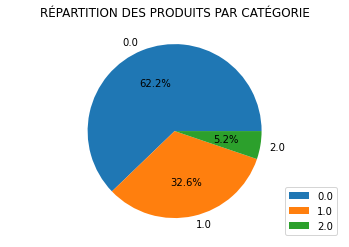

In [299]:
plt.axis("equal")
plt.pie(books, labels = products, autopct='%1.1f%%')
plt.legend(loc='lower right')
plt.title('RÉPARTITION DES PRODUITS PAR CATÉGORIE')
plt.show()

# Graphe 7

In [300]:
data_final["year"] = data_final["date"].map(lambda d: d.year) 
data_final["month"]= data_final["date"].map(lambda d: d.month) 
data_final

C:\Users\Donovan\AppData\Local\Temp/ipykernel_61568/2966986300.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final["year"] = data_final["date"].map(lambda d: d.year)
C:\Users\Donovan\AppData\Local\Temp/ipykernel_61568/2966986300.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final["month"]= data_final["date"].map(lambda d: d.month)


,id_prod,date,session_id,client_id,price,categ,sex,birth,year,month
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,f,1977,2021,4
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,65.75,2.0,f,2000,2022,2
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,10.71,1.0,f,1979,2021,9
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,4.20,0.0,m,1963,2021,10
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,8.99,0.0,f,1980,2021,7
...,...,...,...,...,...,...,...,...,...,...
337011,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454,31.99,1.0,m,1969,2021,5
337012,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268,22.99,0.0,m,1991,2021,6
337013,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137,11.03,0.0,f,1968,2021,3
337014,2_227,2021-10-30 16:50:15.997750,s_112349,c_5,50.99,2.0,f,1994,2021,10


In [301]:
df_books = data_final.sort_values(by=['date'])
df_books['date'] = pd.to_datetime(df_books['date'], utc=True).dt.date
df_books

,id_prod,date,session_id,client_id,price,categ,sex,birth,year,month
176588,0_1259,2021-03-01,s_1,c_329,11.99,0.0,f,1967,2021,3
95285,0_1390,2021-03-01,s_2,c_664,19.37,0.0,m,1960,2021,3
216737,0_1352,2021-03-01,s_3,c_580,4.50,0.0,m,1988,2021,3
180767,0_1458,2021-03-01,s_4,c_7912,6.55,0.0,f,1989,2021,3
293481,0_1358,2021-03-01,s_5,c_2033,16.49,0.0,f,1956,2021,3
...,...,...,...,...,...,...,...,...,...,...
208601,1_456,2022-02-28,s_172422,c_5787,28.27,1.0,f,1986,2022,2
242599,1_370,2022-02-28,s_172423,c_1460,13.11,1.0,m,1989,2022,2
6245,0_1538,2022-02-28,s_172424,c_1876,8.61,0.0,m,1983,2022,2
301528,0_1403,2022-02-28,s_172423,c_1460,15.99,0.0,m,1989,2022,2


In [302]:
df_cat0 = df_books.loc[df_books['categ']== 0.0]
df_cat0
df_cat1 = df_books.loc[df_books['categ']== 1.0]
df_cat1
df_cat2 = df_books.loc[df_books['categ']== 2.0]
df_cat2

,id_prod,date,session_id,client_id,price,categ,sex,birth,year,month
176588,0_1259,2021-03-01,s_1,c_329,11.99,0.0,f,1967,2021,3
95285,0_1390,2021-03-01,s_2,c_664,19.37,0.0,m,1960,2021,3
216737,0_1352,2021-03-01,s_3,c_580,4.50,0.0,m,1988,2021,3
180767,0_1458,2021-03-01,s_4,c_7912,6.55,0.0,f,1989,2021,3
293481,0_1358,2021-03-01,s_5,c_2033,16.49,0.0,f,1956,2021,3
...,...,...,...,...,...,...,...,...,...,...
52698,0_1452,2022-02-28,s_172420,c_707,13.77,0.0,m,1986,2022,2
333000,0_1441,2022-02-28,s_172421,c_612,18.99,0.0,m,1967,2022,2
6245,0_1538,2022-02-28,s_172424,c_1876,8.61,0.0,m,1983,2022,2
301528,0_1403,2022-02-28,s_172423,c_1460,15.99,0.0,m,1989,2022,2


,id_prod,date,session_id,client_id,price,categ,sex,birth,year,month
253637,1_445,2021-03-01,s_8,c_7991,23.99,1.0,m,1968,2021,3
322215,1_556,2021-03-01,s_9,c_6171,24.47,1.0,m,1983,2021,3
309544,1_635,2021-03-01,s_10,c_2218,26.99,1.0,f,1970,2021,3
145207,1_503,2021-03-01,s_12,c_2505,26.99,1.0,f,1982,2021,3
63764,1_310,2021-03-01,s_4,c_7912,14.20,1.0,f,1989,2021,3
...,...,...,...,...,...,...,...,...,...,...
139405,1_541,2022-02-28,s_172413,c_5030,13.99,1.0,f,1973,2022,2
201210,1_601,2022-02-28,s_172406,c_2996,21.99,1.0,m,1980,2022,2
210244,1_498,2022-02-28,s_172401,c_6979,23.37,1.0,f,1988,2022,2
208601,1_456,2022-02-28,s_172422,c_5787,28.27,1.0,f,1986,2022,2


,id_prod,date,session_id,client_id,price,categ,sex,birth,year,month
329732,2_153,2021-03-01,s_29,c_2627,139.99,2.0,m,2004,2021,3
300221,2_62,2021-03-01,s_39,c_184,60.96,2.0,m,2004,2021,3
119307,2_162,2021-03-01,s_61,c_1566,102.82,2.0,m,2004,2021,3
112391,2_41,2021-03-01,s_67,c_7908,68.99,2.0,f,2001,2021,3
51619,2_208,2021-03-01,s_61,c_1566,54.87,2.0,m,2004,2021,3
...,...,...,...,...,...,...,...,...,...,...
208644,2_153,2022-02-28,s_172394,c_1414,139.99,2.0,m,2004,2022,2
191522,2_164,2022-02-28,s_172399,c_2528,52.26,2.0,f,2004,2022,2
208093,2_191,2022-02-28,s_172412,c_2958,67.99,2.0,f,1995,2022,2
66222,2_179,2022-02-28,s_172416,c_8242,49.99,2.0,m,1993,2022,2


In [303]:
table1 = pd.pivot_table(df_cat0, values="price", index=['date'], aggfunc=np.sum)
table1
table2 = pd.pivot_table(df_cat1, values="price", index=['date'], aggfunc=np.sum)
table2
table3 = pd.pivot_table(df_cat2, values="price", index=['date'], aggfunc=np.sum)
table3

,price
date,
2021-03-01,6259.66
2021-03-02,6715.28
2021-03-03,6112.06
2021-03-04,5888.49
2021-03-05,5969.99
...,...
2022-02-24,7009.55
2022-02-25,6382.37
2022-02-26,7145.90


,price
date,
2021-03-01,6811.53
2021-03-02,5627.15
2021-03-03,5691.41
2021-03-04,6098.98
2021-03-05,7071.21
...,...
2022-02-24,6537.60
2022-02-25,6452.78
2022-02-26,7357.53


,price
date,
2021-03-01,3345.05
2021-03-02,2995.04
2021-03-03,2948.28
2021-03-04,3059.62
2021-03-05,4132.21
...,...
2022-02-24,6642.57
2022-02-25,5346.81
2022-02-26,5256.15


Text(0, 0.5, 'CA')

Text(0.5, 0, 'Time')

Text(0.5, 1.0, 'CA pour chaque catégorie (en fonction du temps)')

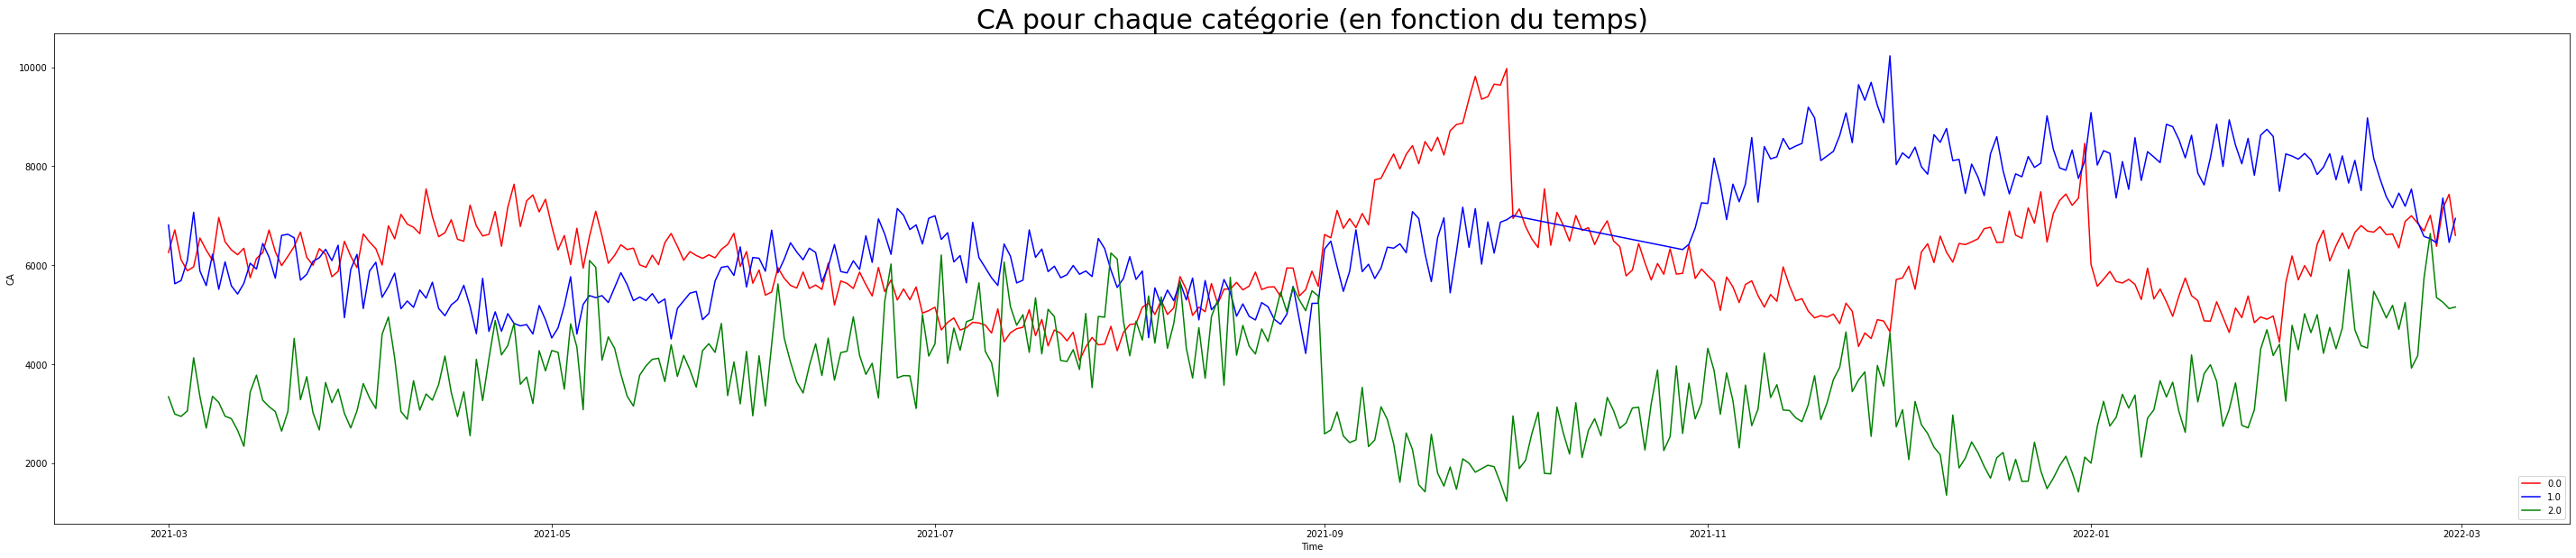

In [304]:
fig, axe = plt.subplots(figsize=(50,10))

y1 = table1.iloc[:]['price']
y2 = table2.iloc[:]['price']
y3 = table3.iloc[:]['price']

plt.plot(table1.index.values, y1 , color="red", label="0.0")
plt.plot(table2.index.values, y2 , color="blue", label="1.0")
plt.plot(table3.index.values, y3 , color="green", label="2.0")

plt.ylabel('CA')
plt.xlabel('Time')
plt.title('CA pour chaque catégorie (en fonction du temps)', fontsize=30)

plt.legend(loc='lower right')


plt.show()

# Graphe 8

In [305]:
table4 = pd.pivot_table(df_cat0, values="price", index=['id_prod'], aggfunc=np.sum)
table4
table5 = pd.pivot_table(df_cat1, values="price", index=['id_prod'], aggfunc=np.sum)
table5
table6 = pd.pivot_table(df_cat2, values="price", index=['id_prod'], aggfunc=np.sum)
table6

,price
id_prod,
0_0,2291.25
0_1,2736.51
0_10,215.40
0_100,41.20
0_1000,1518.48
...,...
0_995,2110.08
0_996,2595.72
0_997,2197.80


,price
id_prod,
1_1,687.84
1_10,3705.01
1_100,1240.66
1_101,379.62
1_102,131.60
...,...
1_95,1539.30
1_96,204.66
1_97,1823.24


,price
id_prod,
2_0,9073.68
2_1,8434.52
2_10,10444.01
2_100,432.66
2_101,20668.77
...,...
2_95,296.97
2_96,13462.71
2_97,804.95


{'whiskers': [<matplotlib.lines.Line2D at 0x20a4ed2a670>,
 'caps': [<matplotlib.lines.Line2D at 0x20a4ed2ad90>,
 'boxes': [<matplotlib.lines.Line2D at 0x20a4ed2a2e0>],
 'medians': [<matplotlib.lines.Line2D at 0x20a4ed234f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20a4ed23880>],
 'means': []}

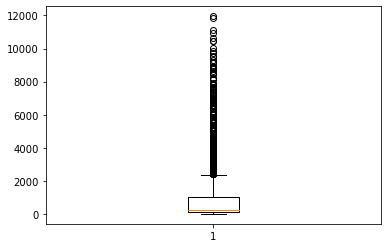

In [306]:
x = table4
plt.boxplot(x)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x20a4ec10070>,
 'caps': [<matplotlib.lines.Line2D at 0x20a4ec10790>,
 'boxes': [<matplotlib.lines.Line2D at 0x20a4ec1bca0>],
 'medians': [<matplotlib.lines.Line2D at 0x20a4ec10eb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20a4ed07280>],
 'means': []}

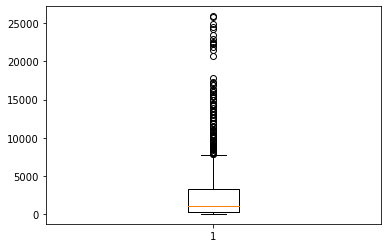

In [307]:
y = table5
plt.boxplot(y)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x20a4f31e8e0>,
 'caps': [<matplotlib.lines.Line2D at 0x20a4f312040>,
 'boxes': [<matplotlib.lines.Line2D at 0x20a4f31e550>],
 'medians': [<matplotlib.lines.Line2D at 0x20a4f312760>],
 'fliers': [<matplotlib.lines.Line2D at 0x20a4f312af0>],
 'means': []}

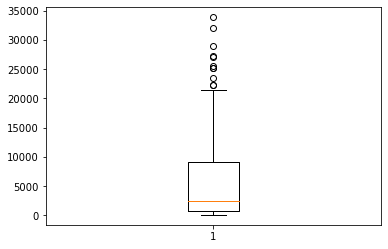

In [308]:
z = table6
plt.boxplot(z)
plt.show()

## Graphe 9

In [309]:
df_catf = df_books.loc[df_books['sex']== 'f']
df_catf
df_catm = df_books.loc[df_books['sex']== 'm']
df_catm

,id_prod,date,session_id,client_id,price,categ,sex,birth,year,month
176588,0_1259,2021-03-01,s_1,c_329,11.99,0.0,f,1967,2021,3
180767,0_1458,2021-03-01,s_4,c_7912,6.55,0.0,f,1989,2021,3
293481,0_1358,2021-03-01,s_5,c_2033,16.49,0.0,f,1956,2021,3
271266,0_1073,2021-03-01,s_6,c_4908,13.99,0.0,f,1981,2021,3
284850,0_279,2021-03-01,s_6,c_4908,16.99,0.0,f,1981,2021,3
...,...,...,...,...,...,...,...,...,...,...
322407,0_1334,2022-02-28,s_172401,c_6979,17.74,0.0,f,1988,2022,2
211744,0_1530,2022-02-28,s_172417,c_6522,3.24,0.0,f,1977,2022,2
228169,2_11,2022-02-28,s_172412,c_2958,201.99,2.0,f,1995,2022,2
328641,0_1366,2022-02-28,s_172413,c_5030,16.65,0.0,f,1973,2022,2


,id_prod,date,session_id,client_id,price,categ,sex,birth,year,month
95285,0_1390,2021-03-01,s_2,c_664,19.37,0.0,m,1960,2021,3
216737,0_1352,2021-03-01,s_3,c_580,4.50,0.0,m,1988,2021,3
121705,0_1304,2021-03-01,s_7,c_1609,5.86,0.0,m,1980,2021,3
253637,1_445,2021-03-01,s_8,c_7991,23.99,1.0,m,1968,2021,3
322215,1_556,2021-03-01,s_9,c_6171,24.47,1.0,m,1983,2021,3
...,...,...,...,...,...,...,...,...,...,...
333000,0_1441,2022-02-28,s_172421,c_612,18.99,0.0,m,1967,2022,2
242599,1_370,2022-02-28,s_172423,c_1460,13.11,1.0,m,1989,2022,2
6245,0_1538,2022-02-28,s_172424,c_1876,8.61,0.0,m,1983,2022,2
301528,0_1403,2022-02-28,s_172423,c_1460,15.99,0.0,m,1989,2022,2


In [310]:
table7 = pd.pivot_table(df_catf, values="price", index=['month'], aggfunc=np.sum)
table7
table8 = pd.pivot_table(df_catm, values="price", index=['month'], aggfunc=np.sum)
table8

,price
month,
1,263385.36
2,259666.56
3,234869.71
4,235599.98
5,244252.29
6,235741.64
7,235373.42
8,235482.31
9,246622.77


,price
month,
1,259569.95
2,273074.32
3,244442.32
4,237380.74
5,245115.66
6,245516.30
7,245525.24
8,243822.88
9,256148.51


<BarContainer object of 12 artists>

<BarContainer object of 12 artists>

([<matplotlib.axis.XTick at 0x20a4f15a9a0>,
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12')])

Text(0.5, 0, 'Mois')

Text(0, 0.5, 'CA')

Text(0.5, 1.0, 'CA par genre et par mois')

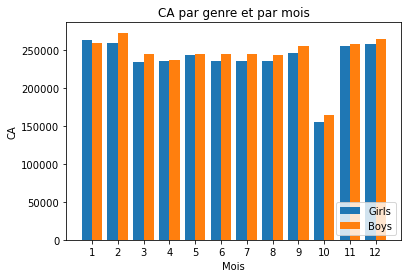

In [311]:
X = table7.index

Ygirls = table7.iloc[0:12]['price']
Zboys = table8.iloc[0:12]['price']
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Ygirls, 0.4, label = 'Girls')
plt.bar(X_axis + 0.2, Zboys, 0.4, label = 'Boys')
  
plt.xticks(X_axis, X)
plt.xlabel("Mois")
plt.ylabel("CA")
plt.title("CA par genre et par mois")
plt.legend(loc='lower right')
plt.show()

# Graphe 12

# Graphe 12

In [312]:
table9 = pd.pivot_table(data_final, values="price", index=['session_id'], aggfunc=np.sum)
table9

,price
session_id,
s_1,11.99
s_10,26.99
s_100,33.72
s_1000,39.22
s_10000,41.49
...,...
s_99994,28.92
s_99995,19.84
s_99996,56.27


{'whiskers': [<matplotlib.lines.Line2D at 0x20a4f025280>,
 'caps': [<matplotlib.lines.Line2D at 0x20a4f0259a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20a4f032eb0>],
 'medians': [<matplotlib.lines.Line2D at 0x20a4f01b100>],
 'fliers': [<matplotlib.lines.Line2D at 0x20a4f01b490>],
 'means': []}

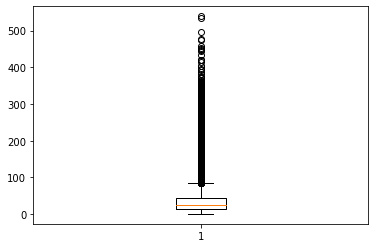

In [313]:
x = table9
plt.boxplot(x)
plt.show()

# Graphe 10

In [314]:
labels = [ "{0} - {1}".format(i, i + 9) for i in range(0, 100, 10) ]
c = pd.cut(data_final.index, np.arange(0, 101, 10),
           include_lowest=True, right=False,
           labels=labels)

data_final.groupby(c).sum()

,price,categ,birth,year,month
0 - 9,133.63,3.0,19774,20213,62
10 - 19,108.72,2.0,19761,20213,65
20 - 29,204.84,6.0,19655,20211,75
30 - 39,143.98,4.0,19813,20211,83
40 - 49,113.76,0.0,19785,20213,46
50 - 59,146.58,4.0,19763,20212,74
60 - 69,140.43,3.0,19758,20213,65
70 - 79,196.21,4.0,19824,20211,66
80 - 89,176.91,7.0,19788,20212,63
90 - 99,154.74,6.0,19781,20215,47
